## 1. Fundamentos de Python

In [ ]:
#string
nom_uh = 'Huaral Rimac Santa'
nom_uh[7:12]
nom_uh.find('Rimac')
nom_uh.count('Rimac')
nom_uh.upper()
nom_uh.casefold()
nom_uh.split()

'huaral rimac santa'

In [ ]:
#math
2+4*8/6
tx = 26.82
tn = 20.41
tm = 22.22
ra = 12.22
tp = (tx+tn)/2

import numpy as np
np.around(tp, 2)
etp = 0.0023*ra*(tm+17.8)*(tx-tn)**0.5
np.around(etp, 2)

2+5.2+8+np.pi+np.nan
True | False

In [ ]:
# estimacion h-s
def evp_hs():
  tx = float(input('Temp max (ºC): '))
  tn = float(input('Temp min (ºC): '))
  tp = np.average([tx, tn])
  ra = float(input('Rad ext (mm/day): '))
  etp = 0.0023*ra*(tp+17.8)*(tx-tn)**0.5
  etp = np.around(etp, 2)
  return(etp)
evp_hs()

Temp max (ºC): 1
Temp min (ºC): 2
Rad ext (mm/day): 3


0.13j

In [ ]:
str_lst = [1, 2, 3]
str_tpl = (1,2,3)
ra = {1: 12.1, 2: 14.2, 3: 15.3, 5: 72.3}

In [ ]:
import pandas as pd
df_etp = pd.DataFrame({'ID': [1,2,3,4], 'pcp': [12.1, 14.3, 8.2, 5.9]})
df_etp.info()
df_etp.size
df_etp.shape
df_etp.columns
df_etp.index = ['1981', '1982', '1983', '1984']
df_etp['pcp'].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4 non-null      int64  
 1   pcp     4 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 192.0 bytes


## 2. Series de tiempo

In [ ]:
from datetime import datetime
import pandas as pd

In [ ]:
dat_ind = datetime(2015, 8, 4)
pd.to_datetime(['2010-01-01', np.datetime64('2010-01-01'), dat_ind])

pd.date_range('2011-01-01', '2012-01-01')
pd.date_range("2010-01-01", periods=3, freq="D")
start = datetime(2010, 1, 1)
end = datetime(2010, 2, 12)
pd.date_range(start, periods = 10, freq = 'M')
pd.date_range(start, end, periods = 5)

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-11 12:00:00',
               '2010-01-22 00:00:00', '2010-02-01 12:00:00',
               '2010-02-12 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
url_file = 'https://raw.githubusercontent.com/lgutierrezl/Python_for_hydrology/main/pcp_daily.csv'
pcp_day = pd.read_csv(url_file, index_col = 0, parse_dates = True)
pcp_day.head()

,Chiquian,Chavin,Nuevo_Pachacoto,Dos_de_Mayo
Fecha,,,,
1981-01-01,0.34,0.00,0.02,0.01
1981-01-02,0.42,0.00,0.03,0.04
1981-01-03,4.52,0.01,1.35,3.15
1981-01-04,4.84,1.07,2.52,0.08
1981-01-05,5.42,2.03,1.10,11.15


<Axes: xlabel='Fecha'>

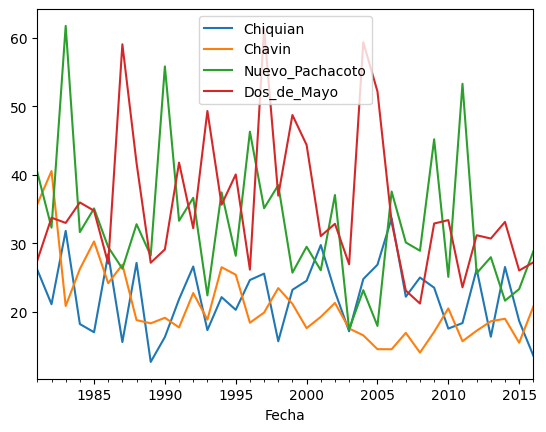

In [ ]:
pcp_day.resample('Y').sum()
pcp_day.resample('Y').max().plot()

<Axes: xlabel='Fecha'>

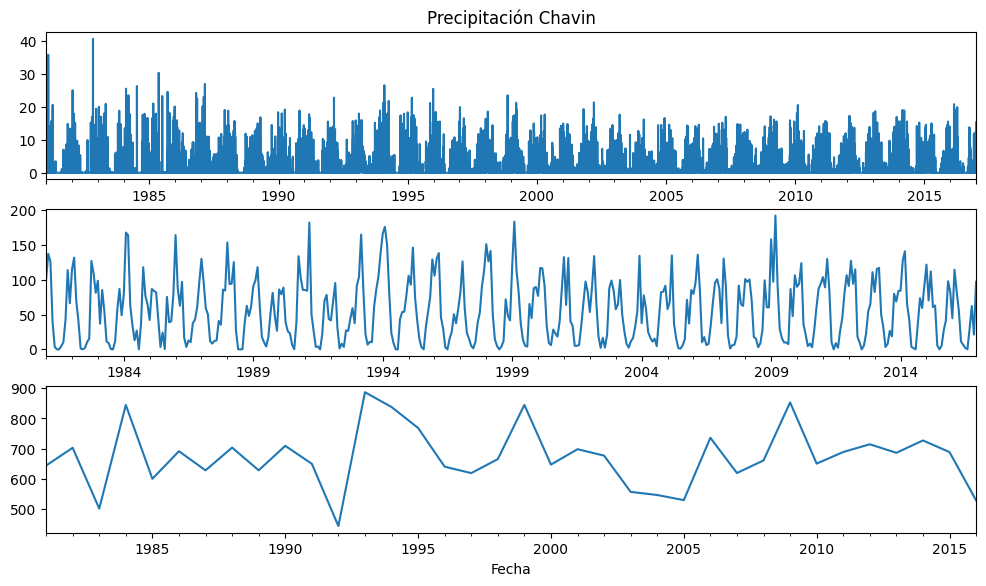

In [ ]:
#visualizacion
import matplotlib.pyplot as plt
fig = plt.figure()
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
pcp_day['Chavin'].plot(kind = 'line', ax = ax0,figsize = (12,6.5)).set_title('Precipitación Chavin')
pcp_day['Chavin'].resample('M').sum().plot(kind = 'line', ax = ax1)
pcp_day['Chavin'].resample('Y').sum().plot(kind = 'line', ax = ax2)

<Axes: title={'center': 'Chiquian'}, xlabel='mes'>

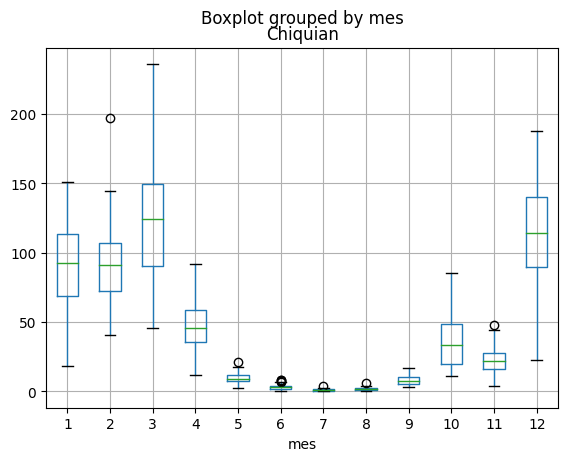

In [ ]:
pcp_mes = pcp_day.resample('M').sum()
pcp_mes['mes'] = pcp_mes.index.month
pcp_clm = pcp_mes.groupby("mes").mean()
pcp_mes.boxplot(column='Chiquian',by='mes')

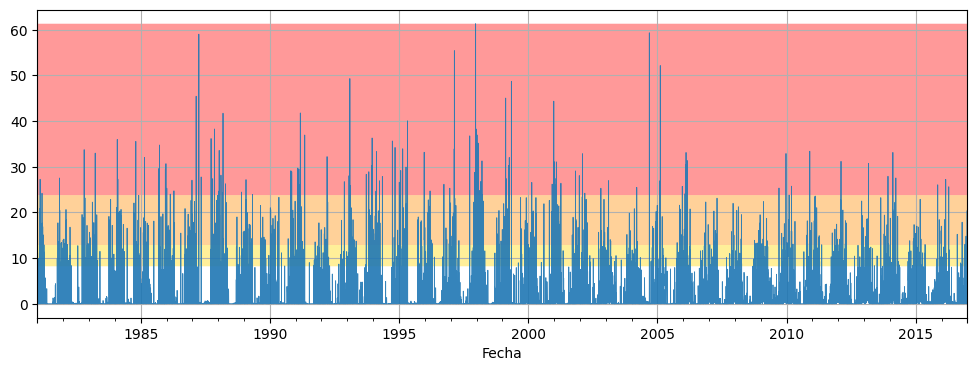

In [ ]:
max_pcp = pcp_day['Dos_de_Mayo'].max()
umb_ext = pcp_day['Dos_de_Mayo'].quantile(0.99)
umb_frt = pcp_day['Dos_de_Mayo'].quantile(0.95)
umb_mod = pcp_day['Dos_de_Mayo'].quantile(0.9)
idx = pcp_day.index.values
pcp_day['Dos_de_Mayo'].plot(kind='line', figsize=(12,4), linewidth=0.6, alpha=0.9)
plt.fill_between(idx, umb_ext, max_pcp, facecolor='red', alpha=0.4)
plt.fill_between(idx, umb_frt, umb_ext, facecolor='darkorange', alpha=0.4)
plt.fill_between(idx, umb_mod, umb_frt, facecolor='gold', alpha=0.4)
plt.grid()

## 3. Datos geoespaciales

In [ ]:
import geopandas as gpd

In [ ]:
uh_all = gpd.read_file('/content/UH.gpkg')

In [ ]:
#vector
em_coata = gpd.read_file('D:/EXM_R/taller_RSH/raw/shp/em_coata_utm.shp')
uh_all = gpd.read_file('D:/EXM_R/taller_RSH/raw/shp/UH.shp')

em_rimac.head()
uh_all.plot()
em_rimac['geometry'].head()
uh_all[1:4]

uh_coata = uh_all[uh_all['NOMBRE'] == 'Cuenca Coata']
uh_coata.plot()
em_coata.crs
uh_coata.crs

em_coata.plot()
uh_coata.crs
uh_coata_utm = uh_coata.to_crs("epsg:32719")
uh_coata_utm.area/10**6
uh_coata_utm

ax = uh_coata_utm.plot(color="yellow", edgecolor="gold")
em_coata.plot(ax=ax, color="red")

ax = uh_all.plot(color="yellow", edgecolor="gold")
uh_coata.plot(ax=ax, color="red")

uh_coata_utm.to_file("D:/EXM_R/taller_RHI/processed/uh_coata_utm_gp.shp")

In [ ]:
!pip install netcdf4
!pip install rioxarray
import xarray as xr
import rioxarray

In [ ]:
#raster
pisco_pm = xr.open_dataset('D:/EXM_R/eo_mean_1981-2010.nc')
pisco_pm.isel(time=0).eo.plot(figsize=(5, 6),cmap='jet')

dd.data_vars
dd.variable.attrs
dd.crs
dd.variable

pcp_0181 = dd.variable.values[0,:,:]
print(np.nanmean(pcp_0181))
print(np.nanmin(pcp_0181))
print(np.nanmax(pcp_0181))

fig=plt.figure(figsize=(8, 6.5))
plt.imshow(pcp_0181,cmap='jet')
plt.colorbar()
plt.title('precipitaton Jan 1981 [mm/mes]')
plt.xlabel('x-index')
plt.ylabel('y-index')

#Define longitud & latitude
Lat = -12.5
Lon = -72.5
#Extract data
eo_pm_data = (pisco_pm["eo"]).sel(latitude= Lat, longitude= Lon)
#Visualize time series Eo
eo_pm_data.plot()

data_eo = pd.DataFrame(eo_pm_data.to_series())
data_eo.to_csv('Eo_export_data.csv')

OSError: ignored